In [6]:
import seaborn as sns      #iris데이터 가져오기 위해
import pandas as pd        # 원핫인코딩  # get_dummies()  
from sklearn.model_selection import train_test_split  # 훈련셋과 테스트셋 분리 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Input, Dropout
import matplotlib.pyplot as plt
import numpy as np

# 데이터 셋

In [2]:
# 1. 데이터 셋
iris = sns.load_dataset("iris")
# display(iris.head(2))
iris_X = iris.iloc[:, :-1].to_numpy()
iris_Y = iris.iloc[:, -1]
# iris_Y = utils.to_categorical(iris_Y) # 숫자가 아니면 to_categorical 불가
iris_Y = pd.get_dummies(iris_Y)
iris_Y[::50]

,setosa,versicolor,virginica
0,1,0,0
50,0,1,0
100,0,0,1


In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
model_save_folder = './model/'
if not os.path.exists(model_save_folder):
    os.mkdir(model_save_folder)   # 절대경로
file = model_save_folder + 'iris-{epoch:03d}-val{val_accuracy:.4f}.h5'   #001 002 003 이렇게 들어옴

early_stopping = EarlyStopping(patience=40)
checkpoint = ModelCheckpoint(filepath=file, monitor='val_accuracy', verbose=1, save_best_only=True)

#1. 데이터 셋
iris = sns.load_dataset("iris")
#display(iris.head(2))

#2. x,y분리
#x ==> 앞 4줄 , y==> 맨 마지막 줄
iris_X = iris.iloc[:, :-1].to_numpy()
iris_Y = iris.iloc[:,-1]
iris_Y = pd.get_dummies(iris_Y).to_numpy()   #iris_Y가 숫자가 아니기때문에  .to_categorical()쓸 수 없고, get_dummies()를 쓴다 

#3.훈련셋과 테스트셋 분리 
# 1 0 0 = setosa /  0 1 0 =>   / 
train_X, test_X, train_Y, test_Y = train_test_split(iris_X, iris_Y, test_size=0.3, random_state=1)
train_X.shape, train_Y.shape, test_X.shape, test_Y.shape 

((105, 4), (105, 3), (45, 4), (45, 3))

# 모델 구성

Epoch 1/300
2/2 [==============================] - 1s 178ms/step - loss: 1.3428 - accuracy: 0.2879 - val_loss: 1.1084 - val_accuracy: 0.4762

Epoch 00001: val_accuracy improved from -inf to 0.47619, saving model to ./model\iris-001-val0.4762.h5
Epoch 2/300
2/2 [==============================] - 0s 34ms/step - loss: 1.1769 - accuracy: 0.3832 - val_loss: 1.0798 - val_accuracy: 0.2857

Epoch 00002: val_accuracy did not improve from 0.47619
Epoch 3/300
2/2 [==============================] - 0s 35ms/step - loss: 1.0771 - accuracy: 0.3660 - val_loss: 1.0731 - val_accuracy: 0.2857

Epoch 00003: val_accuracy did not improve from 0.47619
Epoch 4/300
2/2 [==============================] - 0s 32ms/step - loss: 0.9944 - accuracy: 0.4375 - val_loss: 1.0702 - val_accuracy: 0.5238

Epoch 00004: val_accuracy improved from 0.47619 to 0.52381, saving model to ./model\iris-004-val0.5238.h5
Epoch 5/300
2/2 [==============================] - 0s 33ms/step - loss: 0.9286 - accuracy: 0.7321 - val_loss: 1.0516

2/2 [==============================] - 0s 34ms/step - loss: 0.2699 - accuracy: 0.9762 - val_loss: 0.3876 - val_accuracy: 0.8571

Epoch 00040: val_accuracy did not improve from 0.90476
Epoch 41/300
2/2 [==============================] - 0s 34ms/step - loss: 0.2611 - accuracy: 0.9616 - val_loss: 0.3859 - val_accuracy: 0.8571

Epoch 00041: val_accuracy did not improve from 0.90476
Epoch 42/300
2/2 [==============================] - 0s 36ms/step - loss: 0.2568 - accuracy: 0.9616 - val_loss: 0.3818 - val_accuracy: 0.8571

Epoch 00042: val_accuracy did not improve from 0.90476
Epoch 43/300
2/2 [==============================] - 0s 34ms/step - loss: 0.2594 - accuracy: 0.9483 - val_loss: 0.3711 - val_accuracy: 0.8571

Epoch 00043: val_accuracy did not improve from 0.90476
Epoch 44/300
2/2 [==============================] - 0s 38ms/step - loss: 0.2657 - accuracy: 0.9562 - val_loss: 0.3550 - val_accuracy: 0.9048

Epoch 00044: val_accuracy did not improve from 0.90476
Epoch 45/300
2/2 [==========


Epoch 00081: val_accuracy did not improve from 0.90476
Epoch 82/300
2/2 [==============================] - 0s 33ms/step - loss: 0.1098 - accuracy: 0.9775 - val_loss: 0.1914 - val_accuracy: 0.9048

Epoch 00082: val_accuracy did not improve from 0.90476
Epoch 83/300
2/2 [==============================] - 0s 34ms/step - loss: 0.1047 - accuracy: 0.9854 - val_loss: 0.1863 - val_accuracy: 0.9048

Epoch 00083: val_accuracy did not improve from 0.90476
Epoch 84/300
2/2 [==============================] - 0s 34ms/step - loss: 0.1015 - accuracy: 0.9775 - val_loss: 0.1940 - val_accuracy: 0.9048

Epoch 00084: val_accuracy did not improve from 0.90476
Epoch 85/300
2/2 [==============================] - 0s 33ms/step - loss: 0.1022 - accuracy: 0.9775 - val_loss: 0.2012 - val_accuracy: 0.9048

Epoch 00085: val_accuracy did not improve from 0.90476
Epoch 86/300
2/2 [==============================] - 0s 34ms/step - loss: 0.1114 - accuracy: 0.9775 - val_loss: 0.1958 - val_accuracy: 0.9048

Epoch 00086: v

2/2 [==============================] - 0s 33ms/step - loss: 0.0750 - accuracy: 0.9854 - val_loss: 0.1484 - val_accuracy: 0.9048

Epoch 00123: val_accuracy did not improve from 0.90476
Epoch 124/300
2/2 [==============================] - 0s 31ms/step - loss: 0.0843 - accuracy: 0.9854 - val_loss: 0.1534 - val_accuracy: 0.9048

Epoch 00124: val_accuracy did not improve from 0.90476
Epoch 125/300
2/2 [==============================] - 0s 33ms/step - loss: 0.0725 - accuracy: 0.9775 - val_loss: 0.1624 - val_accuracy: 0.9048

Epoch 00125: val_accuracy did not improve from 0.90476
Epoch 126/300
2/2 [==============================] - 0s 33ms/step - loss: 0.0819 - accuracy: 0.9708 - val_loss: 0.1689 - val_accuracy: 0.9048

Epoch 00126: val_accuracy did not improve from 0.90476
Epoch 127/300
2/2 [==============================] - 0s 33ms/step - loss: 0.0805 - accuracy: 0.9775 - val_loss: 0.1632 - val_accuracy: 0.9048

Epoch 00127: val_accuracy did not improve from 0.90476
Epoch 128/300
2/2 [=====

2/2 [==============================] - 0s 35ms/step - loss: 0.0532 - accuracy: 0.9921 - val_loss: 0.1521 - val_accuracy: 0.9048

Epoch 00164: val_accuracy did not improve from 0.90476
Epoch 165/300
2/2 [==============================] - 0s 33ms/step - loss: 0.0742 - accuracy: 0.9708 - val_loss: 0.1548 - val_accuracy: 0.9048

Epoch 00165: val_accuracy did not improve from 0.90476
Epoch 166/300
2/2 [==============================] - 0s 34ms/step - loss: 0.0533 - accuracy: 0.9841 - val_loss: 0.1537 - val_accuracy: 0.9048

Epoch 00166: val_accuracy did not improve from 0.90476
Epoch 167/300
2/2 [==============================] - 0s 33ms/step - loss: 0.0599 - accuracy: 0.9775 - val_loss: 0.1459 - val_accuracy: 0.9048

Epoch 00167: val_accuracy did not improve from 0.90476
Epoch 168/300
2/2 [==============================] - 0s 33ms/step - loss: 0.0768 - accuracy: 0.9854 - val_loss: 0.1484 - val_accuracy: 0.9048

Epoch 00168: val_accuracy did not improve from 0.90476
Epoch 169/300
2/2 [=====

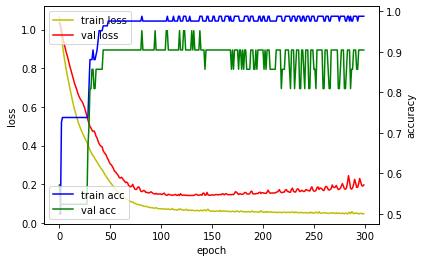

In [17]:
model=Sequential()
model.add(Dense(64, input_dim=4, activation="relu"))   #입력 4개   #2의 승수를 좋아함 예:64. 그러나 60를 넣어도 상관없음
model.add(Dense(50,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(3,activation="softmax"))

#3. 학습과정 설정
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

#4. 학습시키기

hist = model.fit(train_X,train_Y,batch_size=50, epochs=300, validation_split=0.2, callbacks=[early_stopping, checkpoint]) #좋아 데이터만 것만 저장


# 5. 모델 학습 과정 표시하기
# 모델 학습 과정 표시하기
fig, loss_ax = plt.subplots()

loss_ax.plot(fit_hist.history['loss'],'y', label='train loss')
loss_ax.plot(fit_hist.history['val_loss'],'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax = loss_ax.twinx()
acc_ax.plot(fit_hist.history['accuracy'],'b', label='train acc')
acc_ax.plot(fit_hist.history['val_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='lower left')
plt.show()

In [7]:
# 예측 
real = np.argmax(test_Y,axis=1) #실제값
real 

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1], dtype=int64)

In [8]:
# 예측
real = np.argmax(test_Y, axis=1) # 실제값
real

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1], dtype=int64)

In [10]:
pred = model.predict_classes(test_X)
pred

C:\Users\tjoeun\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 1, 1, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 0, 1, 2, 2, 0, 2, 2,
       1], dtype=int64)

In [11]:
np.all(pred==real) #0끼리 같고, 1끼리 같고, 2끼리 같고 

False

In [12]:
ct_result = pd.crosstab(real,pred)
ct_result.index.name ="real"
ct_result.columns.name = "pred"
ct_result   #real data1인데 predict한것 18

pred,0,1,2
real,,,
0,14,0,0
1,0,18,0
2,0,1,12


In [ ]:
# 평가
score = model.evaluate(test_X,test_Y,batch_size=10, verbose=0)

In [ ]:
print("평가된 loss:", score[0])
print("평가된 accuracy:", score[1])
print(score)

In [ ]:
iris.iloc[51]

In [ ]:
#확인용
np.argmax(  model.predict_classes(np.array([  [ 6.4, 3.2, 4.5, 1.5  ] ]))  )
# 1이 출력됨. versicolor 